In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("dataset/cardekho_dataset.csv")
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

#### Feature Selection

In [6]:
X=df.drop(labels=["Unnamed: 0","car_name","brand","selling_price"],axis=1)
Y=df['selling_price']

#### Identifying Numerical and Categorical Column

In [7]:
df.dtypes

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [8]:
numerical=[feature for feature in X.columns if X[feature].dtype!='O']
categorical=[feature for feature in X.columns if X[feature].dtype=='O']
discrete_numerical=[feature for feature in numerical if len(X[feature].unique())<25]
continious_numerical= [feature for feature in numerical if len(X[feature].unique()>25)]

#### Data Encoding

In [9]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [10]:
len(X["model"].unique())

120

In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
le=LabelEncoder()
X['model']=le.fit_transform(X['model'])

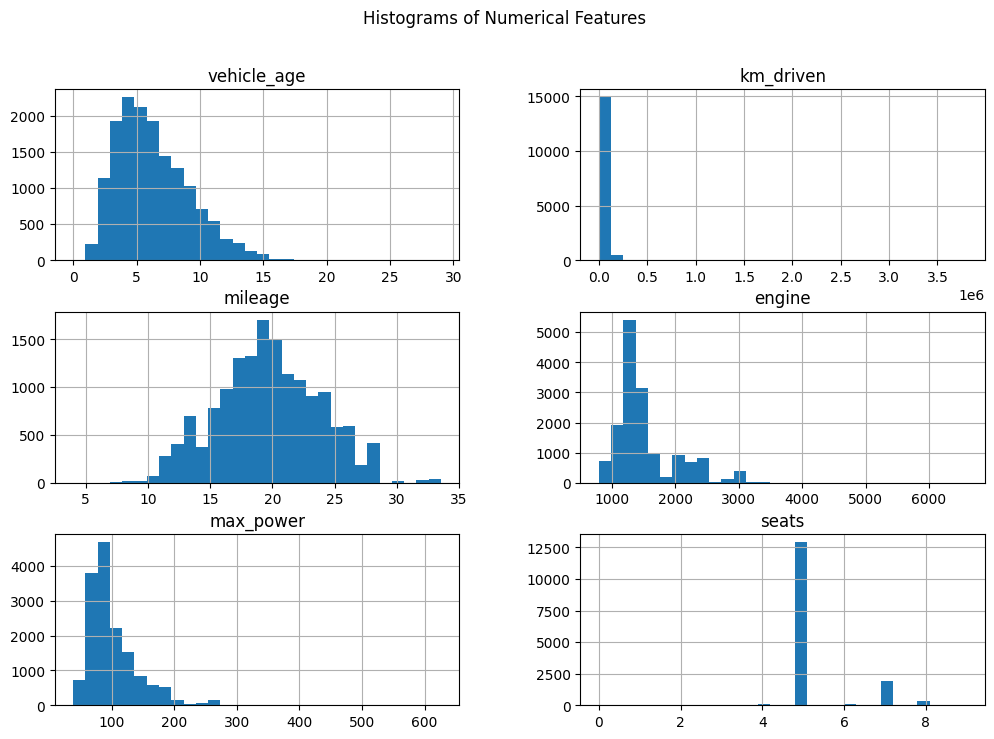

In [13]:
df[numerical].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [14]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [15]:
ct=ColumnTransformer(
    [("OneHotEncoder",OneHotEncoder(drop='first'),["seller_type","fuel_type","transmission_type",]),
     ("StandardScaler",StandardScaler(),numerical)]
,remainder="passthrough")

In [16]:
X=pd.DataFrame(ct.fit_transform(X),columns=ct.get_feature_names_out())

In [17]:
X.head(4)

,OneHotEncoder__seller_type_Individual,OneHotEncoder__seller_type_Trustmark Dealer,OneHotEncoder__fuel_type_Diesel,OneHotEncoder__fuel_type_Electric,OneHotEncoder__fuel_type_LPG,OneHotEncoder__fuel_type_Petrol,OneHotEncoder__transmission_type_Manual,StandardScaler__vehicle_age,StandardScaler__km_driven,StandardScaler__mileage,StandardScaler__engine,StandardScaler__max_power,StandardScaler__seats,remainder__model
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.983562,1.247335,-0.000276,-1.324259,-1.263352,-0.403022,7.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.343933,-0.690016,-0.192071,-0.554718,-0.432571,-0.403022,54.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.647309,0.084924,-0.647583,-0.554718,-0.479113,-0.403022,118.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.983562,-0.360667,0.292211,-0.936610,-0.779312,-0.403022,7.0


#### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#### Model Selection

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,r2_score

In [20]:
models={
    "RandomForest":RandomForestRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso()
}

In [21]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(x_test)

    
    mae_train=mean_absolute_error(Y_train,y_pred_train)
    score_train=r2_score(Y_train,y_pred_train)
    mae_test=mean_absolute_error(y_test,y_pred_test)
    score_test=r2_score(y_test,y_pred_test)
    print(list(models.keys())[i])
    print("Model Performance for training set")
    print("Mean absolute error of training data: ",mae_train)
    print("r2 score of training data: {:.2f}%".format(score_train*100))
    print("Model Performance for testing set")
    print("Mean absolute error of training data: ",mae_test)
    print("r2 score of training data: {:.2f}%".format(score_test*100))

RandomForest
Model Performance for training set
Mean absolute error of training data:  40154.37948288103
r2 score of training data: 97.63%
Model Performance for testing set
Mean absolute error of training data:  102371.07633912918
r2 score of training data: 92.99%
DecisionTree
Model Performance for training set
Mean absolute error of training data:  5164.819922128488
r2 score of training data: 99.95%
Model Performance for testing set
Mean absolute error of training data:  123457.17645150828
r2 score of training data: 88.11%
LinearRegression
Model Performance for training set
Mean absolute error of training data:  268101.6070829864
r2 score of training data: 62.18%
Model Performance for testing set
Mean absolute error of training data:  279618.57941583544
r2 score of training data: 66.45%
Ridge
Model Performance for training set
Mean absolute error of training data:  268059.95250763366
r2 score of training data: 62.18%
Model Performance for testing set
Mean absolute error of training da

In [22]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)
y_pred=model.predict(x_test)

#### Hyperparameter Tunning

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
params={
    'n_estimators':[100],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth':[1,2,3],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2,3],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [25]:
# rmodel=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')
# rmodel.fit(X_train,Y_train)

In [26]:
# rmodel.best_params_

In [27]:
# model=RandomForestRegressor(n_estimators= 100,
#  min_samples_split= 4,
#  min_samples_leaf= 2,
#  max_features= 'sqrt',
#  max_depth= 3,
#  criterion= 'absolute_error',
#  bootstrap= True)

In [28]:
model.fit(X_train,Y_train)
y_pred_tuned=model.predict(x_test)

In [29]:
# from sklearn.metrics import r2_score,mean_absolute_error
# mae_non_tuned=mean_absolute_error(y_test,y_pred)
# score_non_tuned=r2_score(y_test,y_pred)
# mae_tuned=mean_absolute_error(y_test,y_pred_tuned)
# score_tuned=r2_score(y_test,y_pred_tuned)

In [30]:
# print("mean absolute error of simple Randomforest model:",mae_non_tuned)
# print("accuracy score of simple randomforest model: {:.2f}".format(score_non_tuned*100))
# print("mean absolute error of hyperparameter tuned Randomforest model:",mae_tuned)
# print("accuracy score of hyperparameter tuned randomforest model: {:.2f}".format(score_tuned*100))

In [31]:
import pickle

# Save the model to a file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [34]:
pickle.dump(le, open('label_encoder.pkl', 'wb'))
pickle.dump(ct, open('column_transformer.pkl', 'wb'))

#### Predicting new data

In [33]:
new_data=pd.DataFrame([{
    'model': 'Alto',  
    'vehicle_age':9,
    'km_driven': 120000,
    'seller_type': 'Individual',
    'fuel_type': 'Petrol',
    'transmission_type': 'Manual',
    'mileage': 19.7,
    'engine': 796.0,
    'max_power': 46.3,
    'seats': 5
}])
new_data['model']=le.transform(new_data['model'])
X_new_data=pd.DataFrame(ct.transform(new_data),columns=ct.get_feature_names_out())
price = model.predict(X_new_data)[0]
print(price)

178767.7857142857
